Christian Arendt Rasmussen s144466, Frederikke Lehmann s154109 & Clara Foss s154312

# Project - Prediction of top Spotify tracks

For the purpose of this project in the course 42186 Model-based machine learning F19 , we have chosen to work with data from Spotify. We have extracted the data ourselves using the Spotipy Python library inspired by the Kaggle data set (https://www.kaggle.com/nadintamer/top-tracks-of-2017/version/1). We have around 6000 observations consisting of random tracks from official playlists from 2017, 2018 and 2019 (four first months), respectively. Each song has a set of audio features, including popularity danceability, energy, tempo, key, etc., and this leads us to our research question:

### Research question
How can audio features be used to predict the popularity of a track?

#### Importing packages

In [1]:
import pystan
import pystan_utils
import pandas as pd
from pandas import *
from pylab import *
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import spotipy
import random
import math

##### Loading the data from 2017, 2018 and 2019

In [2]:
data1 = pd.read_csv("SpotifyAudioFeatures2017.csv")
data2 = pd.read_csv("SpotifyAudioFeatures2018.csv")
data3 = pd.read_csv("SpotifyAudioFeatures2019.csv")

df_tracks = pd.concat([data1, data2,data3])
df_tracks.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Loud Luxury,Body (feat. brando),7K7MUBCnzgBAvMVW2RTWNs,69,0.0476,0.752,163216,0.764,0.000094,1,0.0543,-4.399,1,0.0380,121.958,4,0.582
1,1,XXXTENTACION,Jocelyn Flores,7m9OqQk4RVRkw9JJdeAw96,89,0.4690,0.872,119133,0.391,0.000004,0,0.2970,-9.144,0,0.2420,134.021,4,0.437
2,2,Billie Eilish,idontwannabeyouanymore,41zXlQxzTi6cGAjpOXyLYH,89,0.7370,0.483,203569,0.412,0.000000,7,0.1160,-8.461,1,0.0402,170.163,3,0.247
3,3,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,89,0.1630,0.599,263400,0.448,0.000000,8,0.1060,-6.312,1,0.0232,95.050,3,0.168
4,4,Ed Sheeran,Happier,2RttW7RAu5nOAfq6YFvApB,86,0.5360,0.522,207520,0.385,0.000000,0,0.1350,-7.355,1,0.0288,89.792,4,0.236


In [3]:
# Group the entries by artist_name and track_name and check for duplicates
grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()
df_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

# doing the same grouping as before to verify the solution
grouped_after_dropping = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()


df_tracks[df_tracks.duplicated(subset=['artist_name','track_name'],keep=False)].count()
data = df_tracks
print("Dimensions of the dataset: ", df_tracks.shape)

Dimensions of the dataset:  (6247, 18)


In [4]:
# Means of the features
df = data.drop(['Unnamed: 0','artist_name',], axis=1)
print(df.mean())

popularity              61.020330
acousticness             0.293460
danceability             0.644558
duration_ms         200112.797823
energy                   0.591989
instrumentalness         0.078177
key                      5.331679
liveness                 0.180572
loudness                -7.887122
mode                     0.543301
speechiness              0.111589
tempo                  118.503272
time_signature           3.931167
valence                  0.445751
dtype: float64


# KDE of audio features 

##### We have illustrated the distribution of each audio feature.
Below, we see that danceability, energy, loudness follow a Gaussian distribution with left-skew. Speechiness and duration follow a Gaussian distribution with right-skew. Tempo is likely to follow a mixture of Gaussians.     

C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Christian\Anaconda3\lib\site-packages\matpl

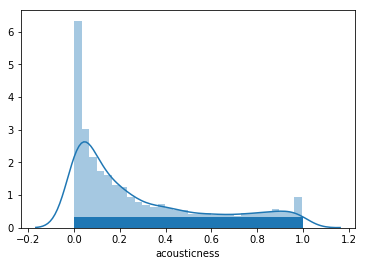

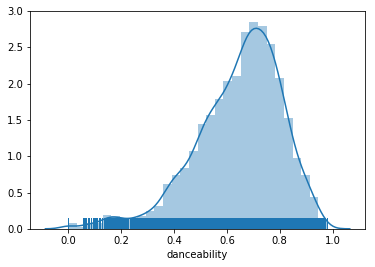

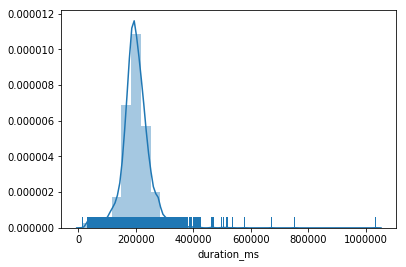

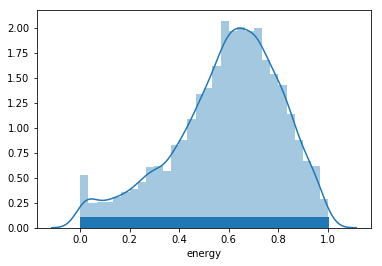

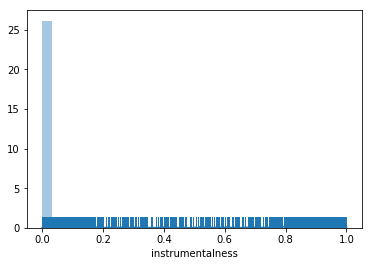

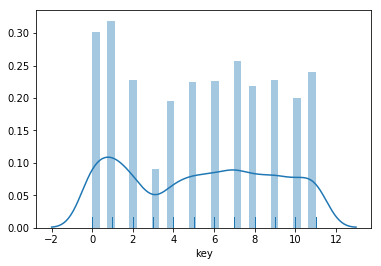

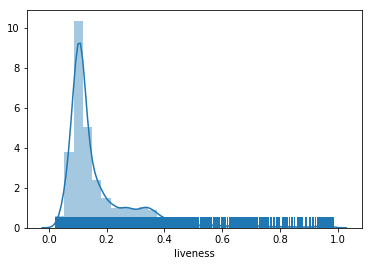

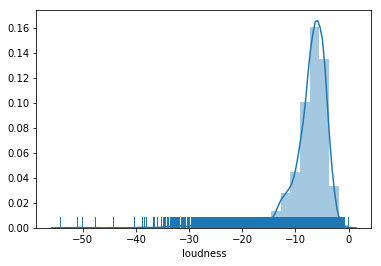

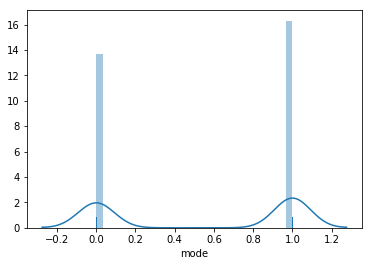

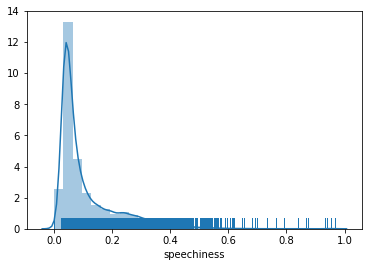

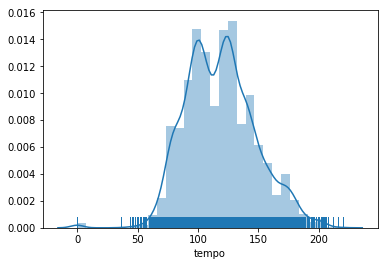

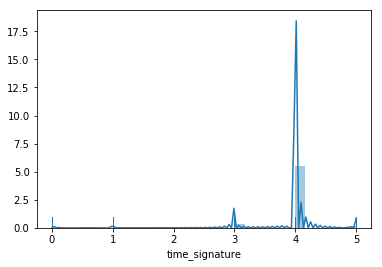

In [5]:
features = data.columns[5:-1]

#cnt = 0
for i in features: 
    plt.figure()
    sns.distplot(data[i], kde=True, rug=True, bins = 30);

#plt.show()
    

# Scatter plots of audio features

In the following, scatter plots for popularity against other audio features are shown  

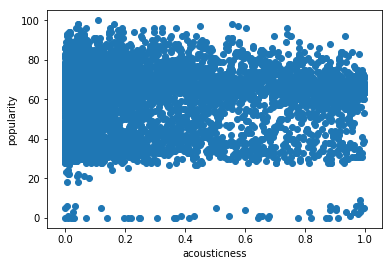

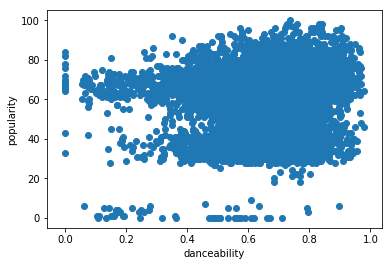

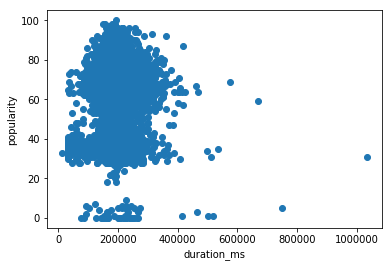

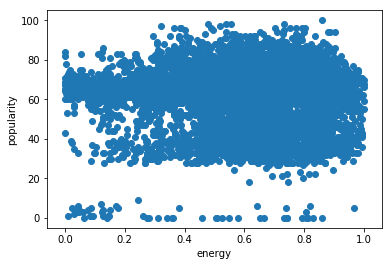

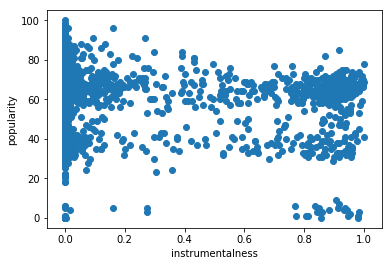

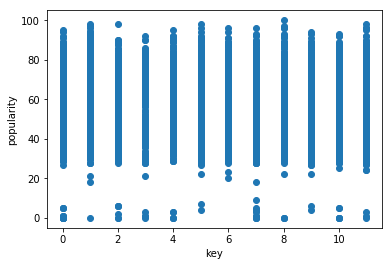

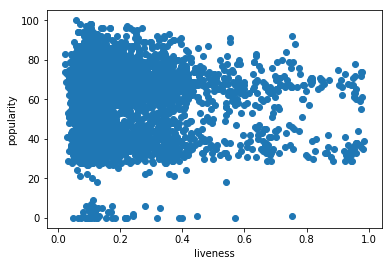

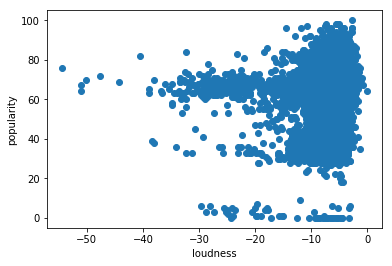

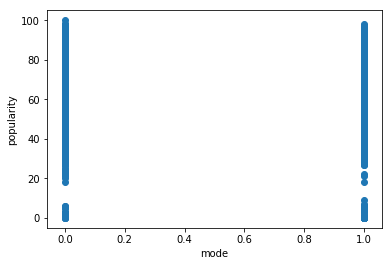

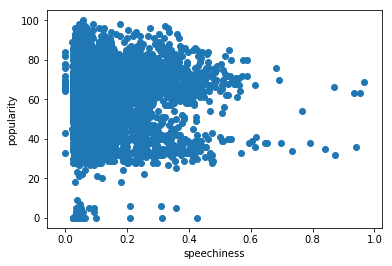

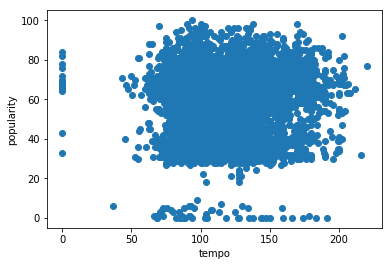

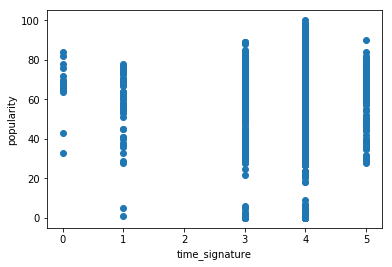

In [6]:
features = data.columns[5:-1]
popdata = data['popularity']


cnt = 0
for i in features: 
    plt.figure()
    cnt = cnt + 1
    #plt.subplot(6,2,cnt)
    plt.scatter(data[i],popdata)
    plt.xlabel(i)
    plt.ylabel('popularity')
    
    
#plt.show

# Scatter matrix to look for correlations between audio features

Scroll a bit to see the  figure...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1F692F198>,
      dtype=object)

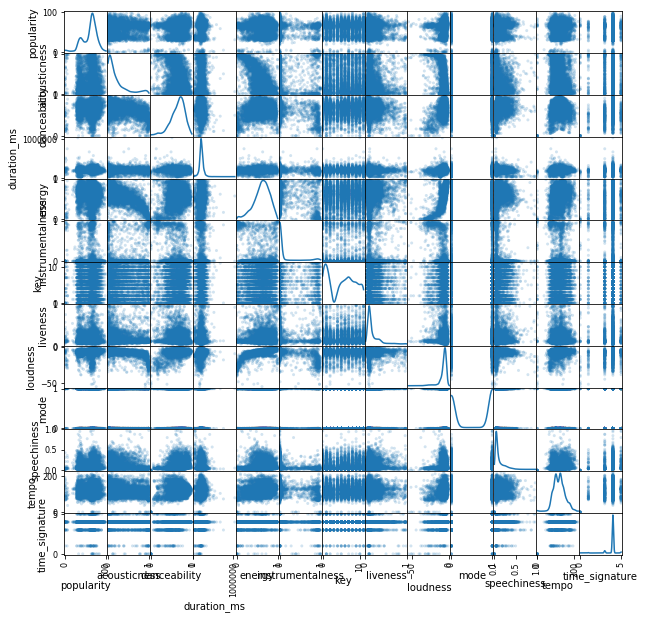

In [7]:
df = pd.DataFrame(data, columns = data.columns[3:-1])
scatter_matrix(df, alpha = 0.2, figsize = (10, 10), diagonal = 'kde')

We see a negative correlation between Energy and Acousticness and a positive correlation between Loudness and Energy. 

# Barplot of audio features given artist

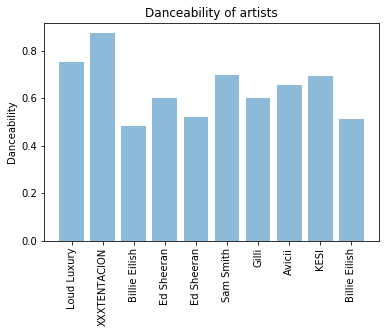

In [9]:
top10 = data[0:10]
objects = top10['artist_name']
y_pos = np.arange(len(objects))
performance = top10['danceability']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Danceability')
plt.title('Danceability of artists')
plt.xticks(rotation=90)
plt.show()

In the barchart above, the dansibility feature can be seen for each of the top 10 artists

# Some frequencies of the data are shown below

Text(0.5,1,'Popularity')

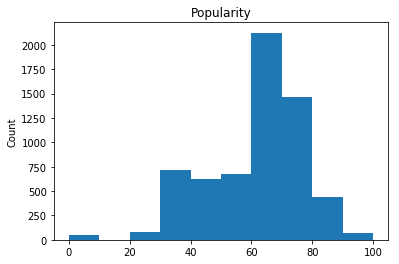

In [10]:
plt.hist(data['popularity'])
plt.ylabel('Count')
plt.title('Popularity')

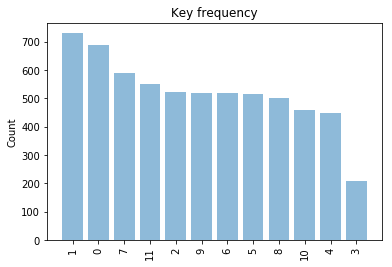

In [11]:
keys = data['key']
dict = {}
for x in keys: 
    if x not in dict: 
        dict[x] = 1
    else:
        dict[x] += 1
        
keyList = list(dict.keys())
keyfreq = list(dict.values())
keyfrequency = DataFrame({'keys' : keyList, 'frequency' : keyfreq} )
keyfrequency.head()

keyfreq = keyfrequency.sort_values('frequency',ascending=False)
objects = keyfreq['keys']
y_pos = np.arange(len(objects))
performance = keyfreq['frequency']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Key frequency')
plt.xticks(rotation=90)
plt.show()

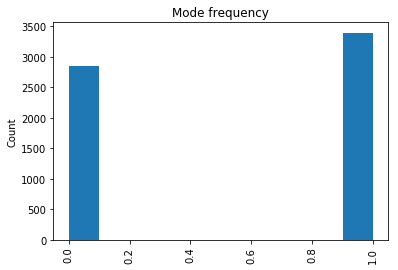

In [12]:
plt.hist(data['mode'])
plt.ylabel('Count')
plt.title('Mode frequency')
plt.xticks(rotation=90)
plt.show()

It appears that among the top 100 tracks, there are 20 % more songs in major than in minor, which means that there are more "sad" songs than "happy" songs.

# PCA to look for variance explained by different features

A Principal Component Analysis has been made to look at how the variance of the audio feature 'popularity' is affected by the other audio features. A bar chart of the first principal component vector is shown below. Given this plot, one can see that relatively high values for acousticness and energy results in a negative projection of the first principal component while the first principal component does not primarily discriminate between mode, speechiness tempo and valence. 

In [13]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['popularity']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [14]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [15]:
pca.explained_variance_ratio_

array([0.29774299, 0.11392305, 0.10549578, 0.09490661, 0.08787701,
       0.07782166, 0.06726082, 0.06476532, 0.04700647, 0.02776915,
       0.01543114])

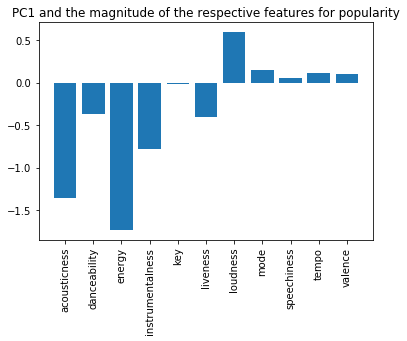

In [16]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for popularity")
# Show graphic
plt.show()
